<a href="https://colab.research.google.com/github/2303A52003/2024_statml-assignments/blob/main/2303A52003_StatML_Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**loading data set - Titanic**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.shape

(891, 12)

In [3]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
#null values
titanic.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [5]:
#filling null values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
if 'Embarked' in titanic.columns:
    titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Impute missing values for all columns
for column in titanic.columns:
    if titanic[column].isnull().any():
        if titanic[column].dtype == 'object':
            titanic[column] = titanic[column].fillna(titanic[column].mode()[0])
        # This ensures all numeric types are filled (not just 'Age')
        elif titanic[column].dtype in ['int64', 'float64']:
            titanic[column] = titanic[column].fillna(titanic[column].median())

titanic.isnull().sum()

# Convert 'Sex' to numerical values
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Check if 'Embarked' column exists before creating dummy variables
if 'Embarked' in titanic.columns:
    titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

In [6]:
#Features and Target Variables
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [7]:
X['Embarked_Q'] = X['Embarked_Q'].replace({True: 1, False: 0})
X['Embarked_S'] = X['Embarked_S'].replace({True: 1, False: 0})

X

<ipython-input-7-da3736d53ffc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Embarked_Q'] = X['Embarked_Q'].replace({True: 1, False: 0})
<ipython-input-7-da3736d53ffc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Embarked_S'] = X['Embarked_S'].replace({True: 1, False: 0})


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,0,1
888,3,1,28.0,1,2,23.4500,0,1
889,1,0,26.0,0,0,30.0000,0,0


In [8]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         3    0  22.0      1      0   7.2500           0           1
1         1    1  38.0      1      0  71.2833           0           0
2         3    1  26.0      0      0   7.9250           0           1
3         1    1  35.0      1      0  53.1000           0           1
4         3    0  35.0      0      0   8.0500           0           1
..      ...  ...   ...    ...    ...      ...         ...         ...
886       2    0  27.0      0      0  13.0000           0           1
887       1    1  19.0      0      0  30.0000           0           1
888       3    1  28.0      1      2  23.4500           0           1
889       1    0  26.0      0      0  30.0000           0           0
890       3    0  32.0      0      0   7.7500           1           0

[891 rows x 8 columns]


In [9]:
#normalize the data
numeric_cols = X.select_dtypes(include=[np.number]).columns
nd = (X[numeric_cols] - X[numeric_cols].min()) / (X[numeric_cols].max() - X[numeric_cols].min())

In [10]:
#Training The Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [12]:
#accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8100558659217877


In [13]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [14]:
#confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[90 15]
 [19 55]]


In [15]:
#svc
s=SVC()
mm=s.fit(X_train,y_train)
mm

SVC()

In [17]:
#perceptron
from sklearn.linear_model import Perceptron
lr1 = Perceptron()
m = lr1.fit(X_train, y_train)
yp1 = m.predict(X_test)

print("Perceptron Accuracy Score:", accuracy_score(y_test, yp1))
print("Perceptron Confusion Matrix:")
print(confusion_matrix(y_test, yp1))
print("Perceptron Classification Report:")
print(classification_report(y_test, yp1))

Perceptron Accuracy Score: 0.6201117318435754
Perceptron Confusion Matrix:
[[38 67]
 [ 1 73]]
Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.36      0.53       105
           1       0.52      0.99      0.68        74

    accuracy                           0.62       179
   macro avg       0.75      0.67      0.61       179
weighted avg       0.79      0.62      0.59       179



In [19]:
#knn
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.7039106145251397

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.87      0.77       105
           1       0.71      0.47      0.57        74

    accuracy                           0.70       179
   macro avg       0.71      0.67      0.67       179
weighted avg       0.71      0.70      0.69       179



In [24]:
#bootstrapping
import numpy as np

def bootstrap(titanic, n_iterations=1000, statistic=np.mean, random_seed=42):
    np.random.seed(random_seed)
    bootstrap_stats = []
    for _ in range(n_iterations):
        sample = np.random.choice(titanic, size=len(titanic), replace=True)
        bootstrap_stats.append(statistic(sample))
    return np.array(bootstrap_stats)

if 'Age' in titanic.columns:
    age_column = titanic['Age']
    n_iterations = 1000

    bootstrap_means = bootstrap(age_column, n_iterations=n_iterations, statistic=np.mean)

    confidence_level = 0.95
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    print(f"Bootstrap mean estimate: {np.mean(bootstrap_means):.4f}")
    print(f"{confidence_level*100:.1f}% confidence interval: ({lower_bound:.4f}, {upper_bound:.4f})")
else:
    print("The dataset does not contain the 'Age' column. Please check the dataset structure.")


Bootstrap mean estimate: 29.3759
95.0% confidence interval: (28.5338, 30.1755)


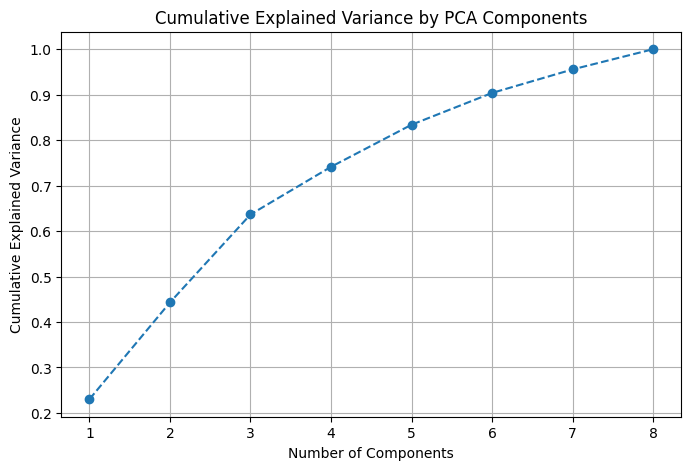

Explained Variance Ratio by Component:
Component 1: 0.2300
Component 2: 0.2130
Component 3: 0.1935
Component 4: 0.1049
Component 5: 0.0926
Component 6: 0.0699
Component 7: 0.0518
Component 8: 0.0444


In [25]:
#pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

print("Explained Variance Ratio by Component:")
for i, ratio in enumerate(explained_variance, start=1):
    print(f"Component {i}: {ratio:.4f}")
